In [1]:
dataset = "NBA_floats"

In [2]:
from MRF_2 import *
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%load_ext line_profiler

In [5]:
%lprun -f MRF._splitter_mrf MRF._one_MRF_tree()

UsageError: Could not find module MRF._splitter_mrf.
NameError: name 'MRF' is not defined


In [6]:
data_in = pd.read_csv(f"/Users/ryanlucas/Desktop/Datasets/{dataset}.csv", index_col="Unnamed: 0")

In [7]:
data_in

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,16.0,87.0,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,66.0,937.0,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,59.0,1508.0,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,24.0,656.0,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,62.0,979.0,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,70.0,2219.0,17.5,0.577,0.301,0.153,4.8,20.1,12.6,23.9,...,14.3,18.4,3.8,3.8,7.6,0.164,1.1,3.0,4.1,3.4
481,44.0,463.0,5.7,0.464,0.477,0.269,2.4,12.1,7.3,7.2,...,17.1,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3
482,7.0,164.0,6.6,0.411,0.644,0.244,1.3,12.6,6.8,8.6,...,3.9,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0
483,55.0,1838.0,16.6,0.531,0.393,0.263,5.2,21.8,13.4,11.7,...,9.7,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,1.0


In [8]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,7), B = 1000, mtry_frac=0.25, oos_pos=np.arange(399,484), trend_push=4,quantile_rate=0.3, print_b = True)

In [9]:
mrf_output = MRF._ensemble_loop()

Tree 1 out of 1000
Tree 2 out of 1000
Tree 3 out of 1000
Tree 4 out of 1000
Tree 5 out of 1000
Tree 6 out of 1000
Tree 7 out of 1000
Tree 8 out of 1000
Tree 9 out of 1000
Tree 10 out of 1000
Tree 11 out of 1000
Tree 12 out of 1000
Tree 13 out of 1000
Tree 14 out of 1000
Tree 15 out of 1000
Tree 16 out of 1000
Tree 17 out of 1000
Tree 18 out of 1000
Tree 19 out of 1000
Tree 20 out of 1000
Tree 21 out of 1000
Tree 22 out of 1000
Tree 23 out of 1000
Tree 24 out of 1000
Tree 25 out of 1000
Tree 26 out of 1000
Tree 27 out of 1000
Tree 28 out of 1000
Tree 29 out of 1000
Tree 30 out of 1000
Tree 31 out of 1000
Tree 32 out of 1000
Tree 33 out of 1000
Tree 34 out of 1000
Tree 35 out of 1000
Tree 36 out of 1000
Tree 37 out of 1000
Tree 38 out of 1000
Tree 39 out of 1000
Tree 40 out of 1000
Tree 41 out of 1000
Tree 42 out of 1000
Tree 43 out of 1000
Tree 44 out of 1000
Tree 45 out of 1000
Tree 46 out of 1000
Tree 47 out of 1000
Tree 48 out of 1000
Tree 49 out of 1000
Tree 50 out of 1000
Tree 51 o

In [17]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [18]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions_NBA.csv", index_col = "Unnamed: 0")

In [19]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [20]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF/mrf_betas_NBA.csv", index_col = "Unnamed: 0")

In [21]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [22]:
phils_betas.columns = my_betas.columns

In [23]:
phils_preds.index = my_preds.index

In [35]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3,4,5,6
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,4.865669,0.003238,0.285203,18.127296,6.860078,6.705995,0.247804
std,3.574665,0.002494,0.223595,14.255225,5.016420,4.935065,0.187464
min,0.011673,0.000002,0.001276,0.045594,0.005745,0.003713,0.000804
25%,2.057244,0.001166,0.112422,7.351008,2.776375,2.766713,0.095249
50%,4.072288,0.002791,0.220078,13.937608,5.718699,5.635856,0.207985
75%,7.303282,0.004736,0.398773,26.534379,10.303315,9.810860,0.351403
max,18.313479,0.010208,1.007661,73.705631,24.859562,26.170783,0.920371


Text(0.5, 0.98, '1000 iterations on the NBA_floats Dataset: betas from Python and R implementation. Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

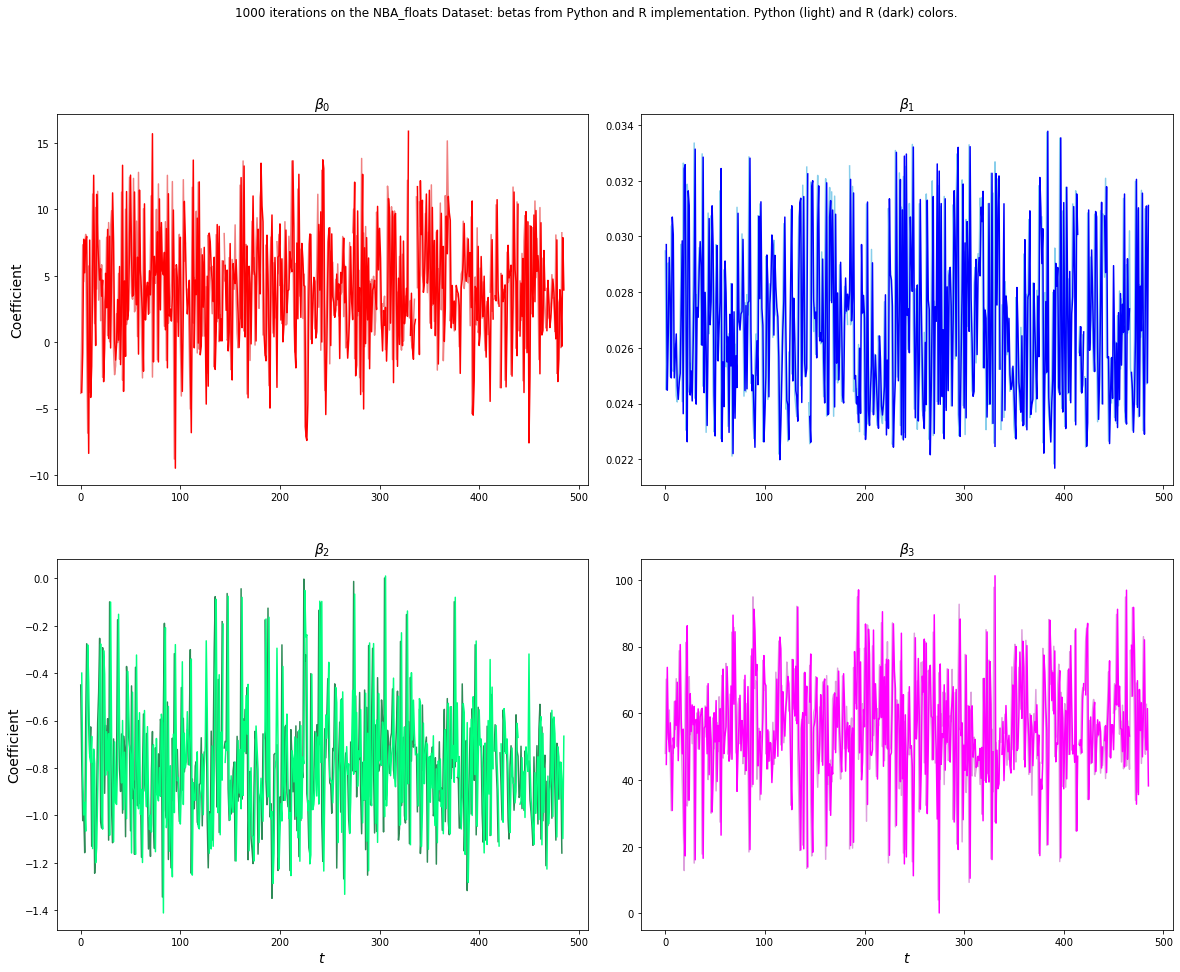

In [32]:
fig, ax =plt.subplots(nrows = 3, ncols = 3, gridspec_kw={"wspace": 0.1})

plt.suptitle(f"1000 iterations on the {dataset} Dataset: betas from Python and R implementation. Python (light) and R (dark) colors.", )

plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [28]:
my_preds.columns = np.arange(0, len(my_preds.columns))

In [34]:
phils_preds

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,19.907192,70.550551,74.467468,17.504135,67.977687,62.755238,33.654789,58.568838,40.801426,32.946651,...,17.216907,53.731893,58.769224,48.453569,7.229436,26.760374,79.680152,32.140955,16.172805,65.331432
1,24.678268,77.719233,76.194382,14.493446,62.200193,63.990838,29.750606,52.369760,44.398645,33.341543,...,35.647812,58.856740,58.210982,46.881902,15.572792,25.183891,81.873220,27.444878,23.087143,62.797280
2,24.928651,77.211993,73.937787,19.406179,69.659167,63.796765,34.134557,55.347828,48.368374,44.298904,...,26.146722,66.207505,56.417888,49.354948,27.017116,42.717428,78.465162,33.210644,10.067137,60.169791
3,32.432160,73.831229,80.416661,15.938235,66.768413,60.738039,31.868729,56.016464,44.594990,38.562528,...,13.965912,66.860935,57.528955,53.511860,-0.461797,34.969962,80.106777,31.448003,13.997472,67.726097
4,30.650488,69.756309,77.902856,9.573659,71.912155,65.751904,29.580517,56.374886,43.983745,31.006415,...,21.309916,59.450124,57.627811,49.506246,15.428522,34.767374,75.708211,33.149916,11.155772,57.301415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15.663797,69.788029,77.023045,13.039227,65.361309,61.692423,43.349498,51.423546,40.644765,16.777963,...,15.566467,58.814402,54.035198,48.087998,9.918820,27.257327,73.699205,28.020758,18.552447,62.534422
996,27.923250,71.052129,71.119439,15.130235,68.724704,69.444319,32.092184,49.991538,45.591815,32.491015,...,16.847108,78.065659,53.585480,46.646197,17.156687,37.219270,72.888636,31.439002,17.314906,63.989399
997,20.327643,75.878927,76.058781,12.646532,69.977786,67.220173,37.241038,53.653926,48.130407,31.601989,...,16.652404,50.981207,61.293648,49.399926,15.838962,31.070186,76.635595,26.950042,13.035281,64.630404
998,19.372261,71.119587,78.800589,13.970470,65.881633,66.862202,32.677905,50.981816,44.626279,27.776887,...,18.300956,53.170838,53.029938,47.265470,9.862567,36.560269,78.223107,38.819160,18.447030,65.104457


Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '50 iterations of the Basketball dataset: R versus Python implementation, average of forecasts')

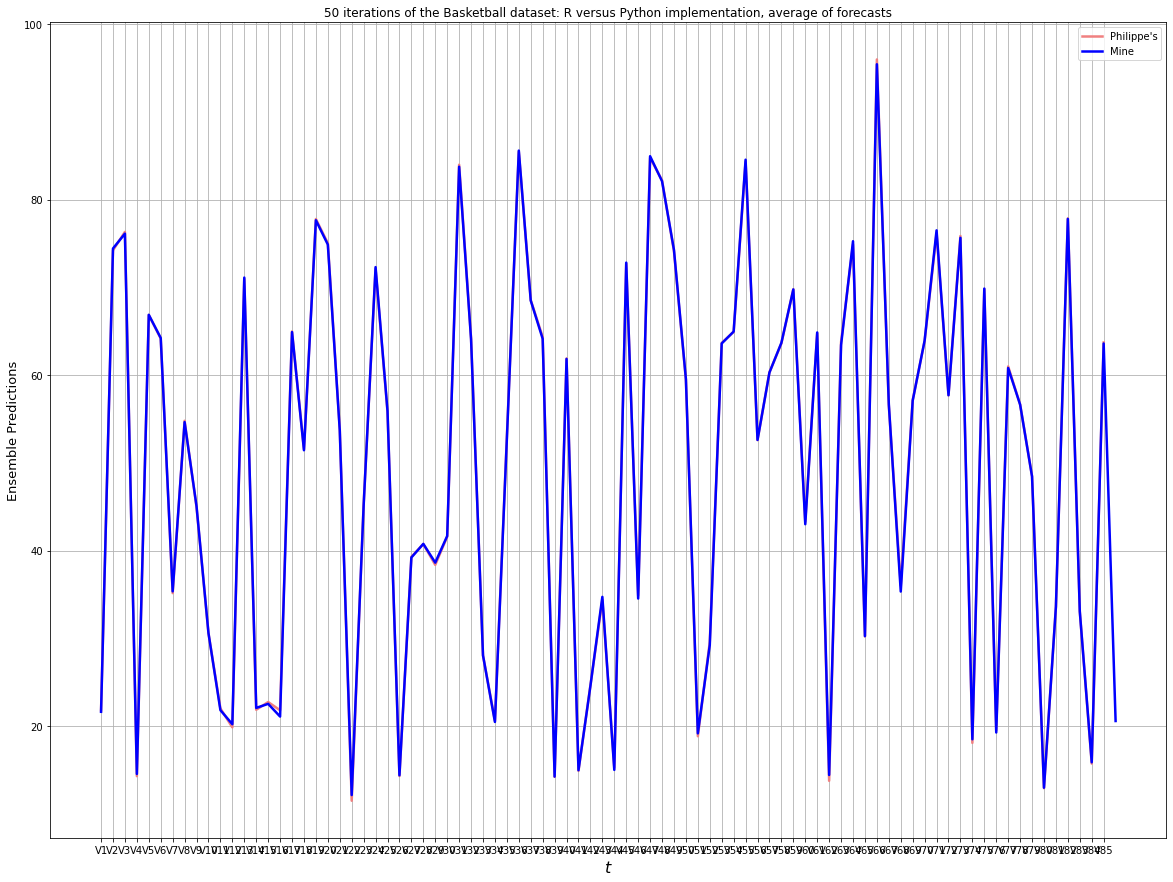

In [30]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("50 iterations of the Basketball dataset: R versus Python implementation, average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)